# About this Notebook
Hey everyone, this notebook is still **work in progress**. I think the chapter concerning [Univariate Transformations on Numerical Features](#sec2) and the respective [stats vocabs](#stats) might already provide alot of useful information for most beginners on kaggle. 

My goal is to use varying data sets and data types to write a compact guide on feature engineering.
**I will add new sections to this notebook, whenever I had enough time work on this notebook**, which might take some time since I am currently attending many courses at university.


<div class="alert alert-danger" role="alert">
    <h3>Feel free to <span style="color:red">comment</span> if you have any suggestions   |   motivate me with an <span style="color:red">upvote</span> if you like this project.</h3>
</div>


# Topics: 

### 1. [Motivation and General Advices](#sec1)###

### 2. [Univariate Transformations on Numerical Data](#sec2)### 
#### 2.1. [Basic Transformations](#sec21)####
#### 2.2. [Log Transformation](#sec22)####
#### 2.3. [Box-Cox Power Transformation](#sec23)####
#### 2.4. [Logit Transformation](#sec24)####
#### 2.5. [Binning with Decision Trees](#sec25) ####
### -1. [Statistics Vocabulary and Plots](#sec-1) ###
#### 1. [Distribution Tails](#sec-11)
#### 2. [The Quantile-Quantile Plot (qqplot)](#sec-12)

Some initial imports..

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import pylab 
import matplotlib.pyplot as plt

df_heart = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df_heart.columns
trestbps = df_heart['trestbps']
chol = df_heart['chol']
target_heart = df_heart['target']
df_health = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
age = df_health['Age']
target_health = df_health['Response']


<a id="sec1"></a>
# 1. Motivation and 
Reworking features to uncover **key relationships** between features and outcome is called **Feature Engineering**. It might be helpful to have some domain in order to understand the data best.

Feature Engineering relies on the resulting insights of [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis).
The combination of Feature Engineering and EDA occurs in different phases of the whole modeling process, e.g. during post-modeling, based on Residual Analysis. **Residual Analysis** is the process of analysing which feature values lead to false predictions.


### Key relationships may be between the outcome and
* a transformation of a feature
* a product or ratio of multiple features 
* a functional relationship between features
* a different representation of a feature


### It helps us to obtain a good trade-off between:
* accuracy
* simplicity
* robustness

### A good Mindset for Feature Engineering leads to:
* Simplifying relationships to either binary flags or monotonic functions, linear if possible. This holds especially for relationships with the target.
* Treating each transformation as one model in an Ensemble (just like in [Pipelining](https://www.kaggle.com/milankalkenings/no-pipelines-you-are-probably-doing-it-wrong))

<a id="sec2"></a>
# 2. Univariate Transformations on Numerical Data 
Numerical Data may..
* be on different scales
* follow a [long-tailed distribution](#tail). Long tails might dominate the underlying calcuations in models, which rely on polynomial calculations on the features (most linear models, SVMs and neural networks)
* have a complex relationship with the outcome
* be represented inefficiently, sometimes simply **normally distributed respresentations may already improve the performance**

### One often wants data to be **normally distributed**, but why?
* The whole distribution is defined by the mean(= mode = median) and the variance, which might be of importance
* the normal distribution is [symmetric](#tail), which has some significant impact on the performance of many models 
* due to the [central limit theorem](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html), many machine learning models are [parametric methods](#stats), which [assume the feature values to be drawn from a normally distributed population](https://stackoverflow.com/questions/54071893/a-feature-distribution-is-nearly-normal-what-does-that-imply-for-my-ml-model) like linear regression, logistic regression, LDA, QDA and Gaussian Naive Bayes

<a id="sec21"></a>
# 2.1. Basic Transformations
I assume that you have heard of these transformations, since they are very common, I will not focus on them: 
* [Centering](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) refers to subtracting the mean of a column
* [Standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) refers to dividing a centered feature by the standard deviation and leads to a standard deviation of one
* [Range Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) refers to using the Minimum and the Maximum value of a feature to rescale the data on a different scale (e.g. between 0 and 1)

All of the above transformations are especially useful when the numerical features have to be on the same scale. KNN and SVM might benefit from it the most.

* [Smoothing](https://en.wikipedia.org/wiki/Smoothing) might be interesting for getting more stable data and getting ridd of outliers. Especially useful for Time Series and Images



<a id="sec22"></a>
<a id="log"></a>
# 2.2. Log Transformation
$\Large
     x_{transformed}=ln(x)
$
* commonly used
* suitable for data which approximately follows a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)
* is a special case of the [Box-Cox Transformation](#box-cox), so take a look at that section if you are interested in this kind of transformations


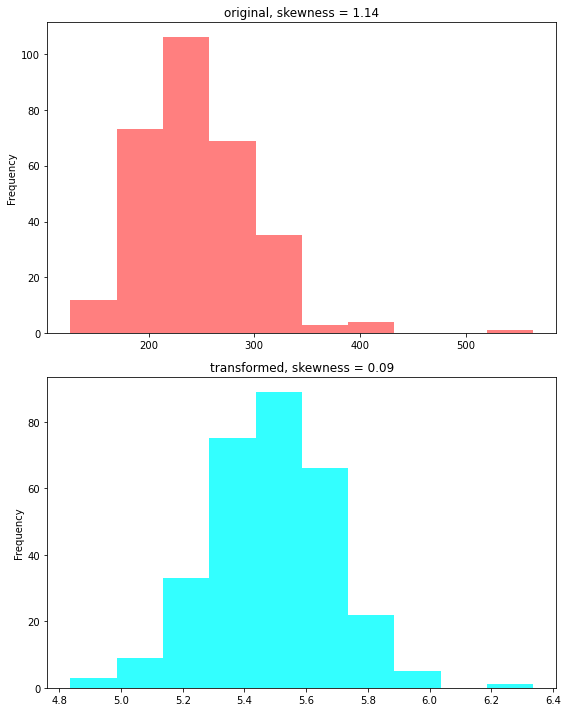

In [2]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

skewness = stats.skew(chol)
title = f'original, skewness = {round(skewness, 2)}'
chol.plot(kind='hist', ax=ax1, color='red', alpha=0.5, title=title)
chol_t = chol.apply(np.log)
chol_t = pd.Series(chol_t)
skewness_t = stats.skew(chol_t)
title_t = f'transformed, skewness = {round(skewness_t, 2)}'
chol_t.plot(kind='hist', ax=ax2, color='cyan', alpha=0.8, title=title_t)

plt.tight_layout()
plt.show()

<a id="sec23"></a>
<a id="box-cox"></a>
# 2.3. Box-Cox Power Transformation


$\Large
     x_{transformed}=\left\{\begin{array}{ll} \frac{x^\lambda}{\lambda}, & x\neq 0 \\
         ln(x), & x = 0\end{array}\right. 
$
  
  
  
* transforms the feature into normal shape
* the paramter $\lambda$ might be set explicitely or might be estimated in order to obtain **as normally distributed data as possible**
* different $\lambda$ cover the Identity Transformation, the [Log Transformation](#log), the Square Root Transformation, the Inverse Transformation, and no-name transformations in between
* requires the data to be positive
* is a [variance stabilizing transformation](https://en.wikipedia.org/wiki/Variance-stabilizing_transformation) 
* improves the **validity** of Pearson **Correlation**, and thus **multicollinearity** between features
* the [scipy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) allows us to store the best lambda. We can apply a Box-Cox transformation with that lambda value when predicting outcomes for our test data/ validation data

Another Power Transformation that might be interesting is the [Yeo Johnson transformation](https://www.stat.umn.edu/arc/yjpower.pdf). It allows the feature to contain negative values

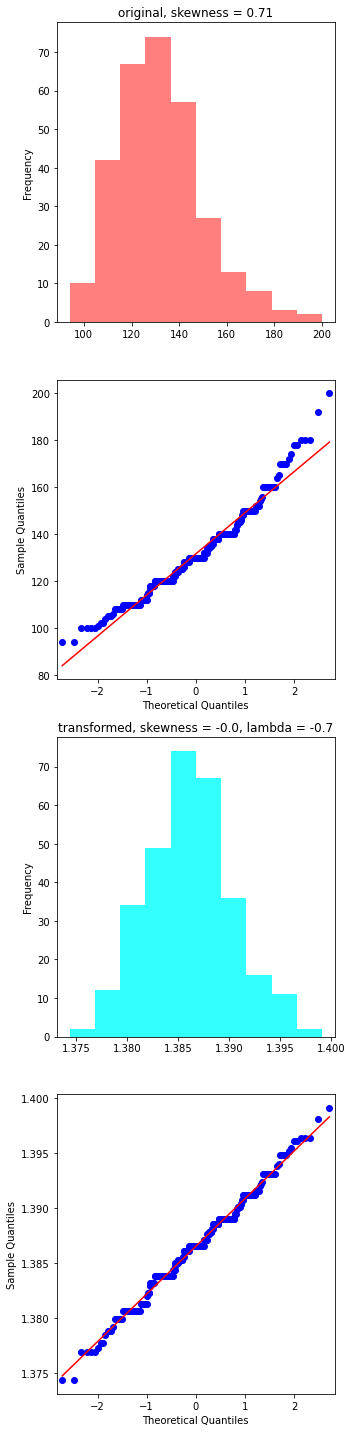

In [3]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))

# original
skewness = stats.skew(trestbps)
title = f'original, skewness = {round(skewness, 2)}'
trestbps.plot(kind='hist', ax=ax1, color='red', alpha=0.5, title=title)

##qqplot
qqplot(data=trestbps, dist="norm", ax=ax2, line='s')

# transformation
trestbps_t, lmbda_best = stats.boxcox(trestbps)
trestbps_t = pd.Series(trestbps_t)
skewness_t = stats.skew(trestbps_t)
title_t = f'transformed, skewness = {round(skewness_t, 2)}, lambda = {round(lmbda_best, 2)}'
trestbps_t.plot(kind='hist', ax=ax3, color='cyan', alpha=0.8, title=title_t)

##qqplot
qqplot(data=trestbps_t, dist="norm", ax=ax4, line='s')


plt.tight_layout()
plt.savefig('.png')
plt.show()

As we can see in the [qqplots](qqplot), the data used to be [right skewed](#tail) and matches the normal distribution way better now.

https://en.wikipedia.org/wiki/Power_transform

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

https://www.statisticshowto.com/box-cox-transformation/

https://en.wikipedia.org/wiki/Variance-stabilizing_transformation

<a id="sec24"></a>
# 2.4. Logit Transformation
$\Large
     x_{transformed}=ln(\frac{x}{1-x})
$
* useful on continous data between 0 and 1, e.g. proportions, with a **sigmoid distribution** (many values with either very high or very low values)
* transformed data provides better distinction between the the data with either very high or very low values
* provides the log odds
* maps the data to continous values between **-inf** and **inf**
* the ends of the scale have a larger difference on the logit-transformed scale
* is a [variance stabilizing transformation](https://en.wikipedia.org/wiki/Variance-stabilizing_transformation) 
* the [scipy implementation](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.special.logit.html)


The [Arcsine Transformation](http://strata.uga.edu/8370/rtips/proportions.html) works pretty similar and might be better in some cases, but in general, the Logit Transformation is the better choice.

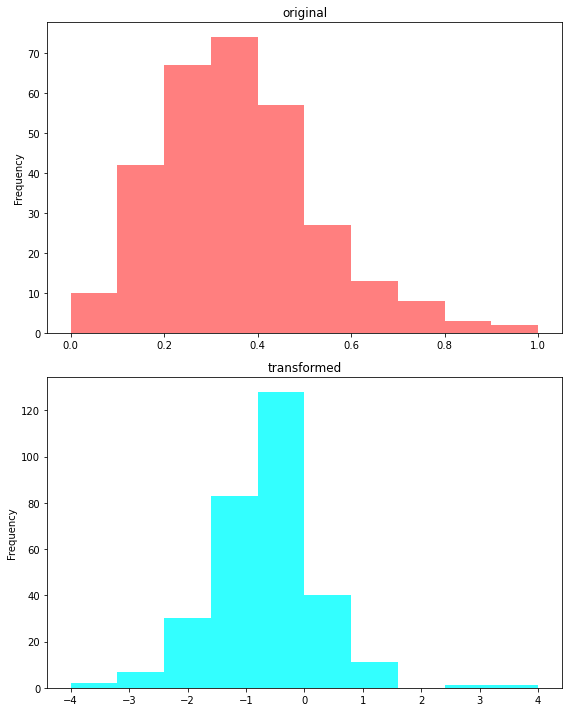

In [4]:
from sklearn.preprocessing import MinMaxScaler
from scipy.special import logit
mms = MinMaxScaler()
trestbps_mms = pd.Series(mms.fit_transform(trestbps.values.reshape(-1, 1)).flatten())


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
title = f'original'
trestbps_mms.plot(kind='hist', ax=ax1, color='red', alpha=0.5, title=title)

trestbps_t = pd.Series(logit(trestbps_mms))
trestbps_t = trestbps_t.replace(np.Inf, 4) # for the plot
trestbps_t = trestbps_t.replace(np.NINF, -4) # for the plot
trestbps_t = pd.Series(trestbps_t)
title_t = f'transformed'
trestbps_t.plot(kind='hist', ax=ax2, color='cyan', alpha=0.8, title=title_t)
plt.tight_layout()
plt.show()

https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.special.logit.html

http://strata.uga.edu/8370/rtips/proportions.html

https://www.statsdirect.com/help/data_preparation/transform_logit.htm

<a id="sec25"></a>
# 2.5. Binning with Decision Trees
Binning Transforms numerical features into categorical features, which we can treat like any other categorical feature. There are several approaches like taking Quantiles as bin limits, or any arbitrary numbers. For example, if your job is to find out, whether patients which are older than 60 have a higher chance to have a specific illness, it might be interesting to bin the numerical age feature using the intervals $(0, 60)$ and $[60,\text{inf})$. One of the less self explaining methods of binning is **Binning with Decision Trees:**
* The bins will not necessarily contain equal numbers of cases, but we might end up being lucky, which might improve the model performance even more
* Each predicted probability will form one category
* Since Predictions are made in the leaf nodes, and multiple leafs could make the same predictions, we end up having as many categories as leaf nodes or fewer
* Usually improves the **correlation with the target**, due to having a [monotonical relation with the target](https://www.statisticshowto.com/monotonic-relationship/)
* handles outliers, since they are assigned to one of the bins
* Since Deep Decision Trees have a High [Variance](https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/), this procedure might lead to overfitting

In [5]:
df_heart_failure = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
c_p = df_heart_failure['creatinine_phosphokinase']
target_heart_failure = df_heart_failure['DEATH_EVENT']

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
x = c_p.values.reshape(-1,1)

hyperparameter = {'max_depth' : [1,2,4, 6, 8]}
val = GridSearchCV(DecisionTreeClassifier(), 
                         hyperparameter, cv=5, 
                         scoring='roc_auc')

val.fit(x, target_heart_failure)
disc_tree = val.best_estimator_
# do this on bith, train and test set:
x_binned = pd.Series(disc_tree.predict_proba(x)[:,1], name='x_binned')

### Let's take a look at the Resulting categories, the tree and the correlation improvement.

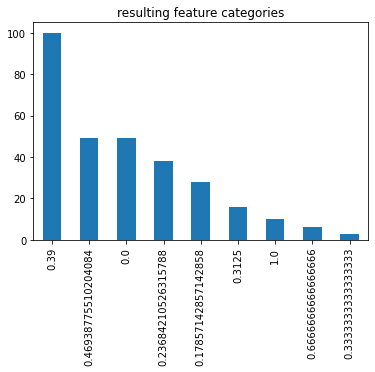

In [6]:
x_binned.value_counts().plot.bar(title='resulting feature categories')
plt.show()

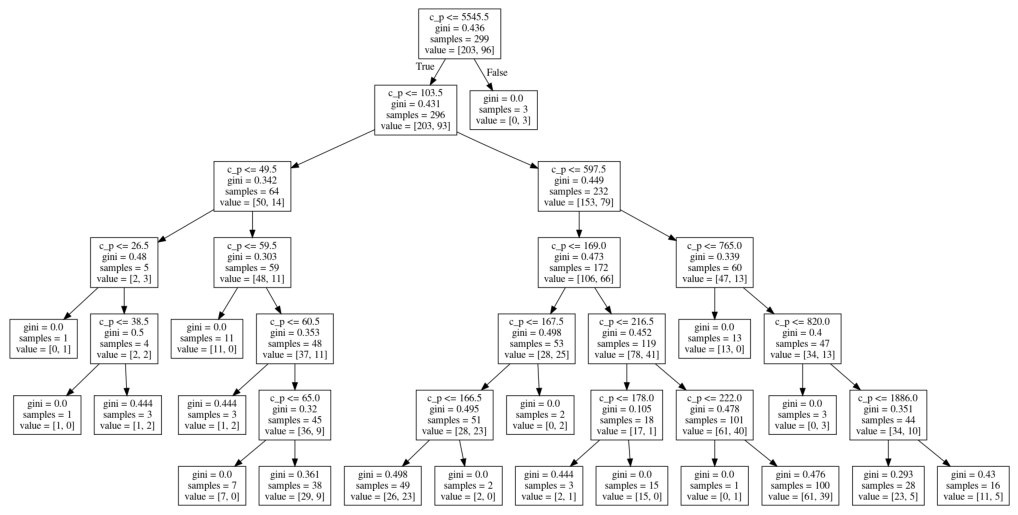

In [7]:
from sklearn.tree import export_graphviz
import cv2
export_graphviz(disc_tree, 'tree.dot', feature_names = ['c_p'])
! dot -Tpng tree.dot -o tree.png
img = cv2.imread('tree.png')
plt.figure(figsize = (18, 18))
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
cor = np.corrcoef(target_heart_failure, x.flatten())[0][1]
cor_transformed = np.corrcoef(target_heart_failure, x_binned)[0][1]
print(f'The Pearson Correaltion between the Target and the numerical feature: {round(cor, 2)}')
print(f'The Pearson Correaltion between the Target and the binned feature: {round(cor_transformed, 2)}')

The Pearson Correaltion between the Target and the numerical feature: 0.06
The Pearson Correaltion between the Target and the binned feature: 0.44


Note: I didn't finetune the other parameters of the decision tree, and I used the *roc_auc* score. One should always use an appropriate score, and feel free to finetune the other hyperparameters in your models, to obtain the best possible features.


further sources: 

https://www.youtube.com/watch?v=vsKNxbP8R_8?t=1388

https://towardsdatascience.com/discretisation-using-decision-trees-21910483fa4b



<a id="sec-1"></a>
<a id="stats"></a>
# -1. Statistics Vocabulary and Plots
* **population:** 
the true data one could achieve with immense effort
* **sample:** 
the part of the data which is available for the modeling process / the training data 
* **Population Parameter:** 
an aspect of a population (e.g. the ground truth mean of a feature)
* **statistic:** 
an aspect of a sample (e.g. the mean of a feature in our training data) 
* **parametric statistical test:** 
makes an assumption about the population parameters(e.g. stdent's T test, ANOVA)
* **nonparametric statistical test:** 
doesn't assume anything about the population parameters (e.g. chi-square)
* **parametric models:**
machine learning models which make strong assumptions/have a high bias about the sample on which they are applied (e.g. they assume the data to follow a specific distribution).

<a id="tail"></a>
### Distribution Tails
* **tail:** The part on the left side of the modes of the distribution is called the left tail and vice versa.
* **heavy-tailed distribution:** A Distribution with a bigger area under the curve in the tails than a normal distribution
* **long-tailed distribution:** A distribution with a long tail has some values which are far away from the mean of the distribution on the respective side of the mean(most long tails are also **"thin"** for obvious reasons). long tailed distributions contain many outliers; vice versa:**short and fat** 
* **skewness:** describes the asymmetry of a distribution
* **negative skew:** distribution tends to have a long tail on the left side
* **positive skew:** distribution tends to have a long tail on the right side
* **zero skewness:** both sides of the modes balance out over all. (e.g. symmetry, or one tail is long and thin and the other is short but fat
* [**kurtosis:**](https://corporatefinanceinstitute.com/resources/knowledge/other/kurtosis/) measures the conformity of a distributions tails with the tails of a normal distribution

<a id="qqplot"></a>
### The Quantile-Quantile Plot (qqplot)
* plots the [quantiles](https://en.wikipedia.org/wiki/Quantile) (basically just the data sorted in ascending order) of two variables against each other
* each axis represents one of these variables
* the more similar the distributions of the variables are, the more looks the plot like the line formed by $x=y$
* quantile plots underneath the line have lower $y$-variable values than $x$-variable values and vice versa
* is oftentimes used to determine graphically, whether the data follows any known distribution like the normal distribution (by plotting these known distributions against the data)
* take a look at these [typical qqplot results](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) and the respective interpretations regarding [skewness and kurtosis](#tail).